# Pontificia Uniiversidad Javeriana
## Camilo José Martínez Patiño



In [0]:
#import findspark
#findspark.init()

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
#import squarify
from sklearn.metrics import roc_curve, auc

#Biblioteca PySpark
import warnings
import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType, IntegerType
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import input_file_name, mean, col, split, regexp_extract, when, lit, isnan, count, udf, isnan
from pyspark import SparkFiles

#Bioblioteca ML para PySpark
from pyspark.ml import Pipeline

#Importar el SO
from time import time
from pyspark.conf import SparkConf
import os

# Conexión a Spark

In [0]:
#SPARK_MASTER_URL = os.getenv("SPARK_MASTER_URL", "spark://10.43.103.125:7077")
#configura = SparkConf()
#configura.setMaster(SPARK_MASTER_URL)
#configura.set('spark.local.dir', '/almacen')
#configura.setAppName("PrimerSparkMartinez")
#spark = SparkSession.builder.config(conf=configura).getOrCreate()
#SQLContext(sparkContext=spark.sparkContext, sparkSession=spark)
#spark = spark.sparkContext

### Revisar si El servicio esta vivo


spark

In [0]:
urlStroke = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Varios/stroke_pyspark.csv"
spark.sparkContext.addFile(urlStroke)


In [0]:
dfStroke = spark.read.csv("file://"+SparkFiles.get("stroke_pyspark.csv"),header = True, inferSchema = True)

In [0]:
dfStroke.show()


+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [0]:
dfStroke.columns



['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [0]:
#Nombres = ["Genero","Edad","Hipertension","Enfermedad_Corazon","Casado","Residencia","Glucosa","IMM","Fumador","Stroke"]
# Renombrar columnas
#df_renombrado = dfStroke.withColumnRenamed('gender', 'Genero') \
 #                .withColumnRenamed('hypertension', 'hipertensión') \
  #                .withColumnRenamed('heart_disease', 'enfermedad_cardiaca') \
   #               .withColumnRenamed('ever_married', 'siempre_casado') \
    #              .withColumnRenamed('work_type', 'tipo_de_trabajo') \
     #             .withColumnRenamed('Residence_type', 'tipo_de_residencia') \
      #            .withColumnRenamed('avg_glucose_level', 'nivel_promedio_glucosa') \
       #           .withColumnRenamed('bmi', 'imc') \
        #          .withColumnRenamed('smoking_status', 'estado_de_fumado') \
         #         .withColumnRenamed('stroke', 'accidente_cerebral')
#df_renombrado.columns
Nombres = ["id", "Genero", "edad", "hipertension", "enfermedad_corazon", "casado", "trabajo",
           "residencia", "glucosa", "imc", "fumador", "infarto" ]

df_Stroke01 = dfStroke

for antes, despues in zip(df_Stroke01.columns, Nombres):
    df_Stroke01  = df_Stroke01.withColumnRenamed(antes, despues)


df_Stroke01.show()

+-----+------+----+------------+------------------+------+-------------+----------+-------+----+---------------+-------+
|   id|Genero|edad|hipertension|enfermedad_corazon|casado|      trabajo|residencia|glucosa| imc|        fumador|infarto|
+-----+------+----+------------+------------------+------+-------------+----------+-------+----+---------------+-------+
| 9046|  Male|67.0|           0|                 1|   Yes|      Private|     Urban| 228.69|36.6|formerly smoked|      1|
|51676|Female|61.0|           0|                 0|   Yes|Self-employed|     Rural| 202.21| N/A|   never smoked|      1|
|31112|  Male|80.0|           0|                 1|   Yes|      Private|     Rural| 105.92|32.5|   never smoked|      1|
|60182|Female|49.0|           0|                 0|   Yes|      Private|     Urban| 171.23|34.4|         smokes|      1|
| 1665|Female|79.0|           1|                 0|   Yes|Self-employed|     Rural| 174.12|  24|   never smoked|      1|
|56669|  Male|81.0|           0|

In [0]:
df_Stroke01.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Genero: string (nullable = true)
 |-- edad: double (nullable = true)
 |-- hipertension: integer (nullable = true)
 |-- enfermedad_corazon: integer (nullable = true)
 |-- casado: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- residencia: string (nullable = true)
 |-- glucosa: double (nullable = true)
 |-- imc: string (nullable = true)
 |-- fumador: string (nullable = true)
 |-- infarto: integer (nullable = true)



In [0]:
#La variable target accidente_cerebral, se presenta de tipo entero
#La variable imc, se en string, toca pasarla a double 
df_Stroke01 =df_Stroke01.withColumn("imc",df_Stroke01.imc.cast(DoubleType()))  

df_Stroke01 =df_Stroke01.withColumn("edad",df_Stroke01.edad.cast(IntegerType()))

df_Stroke01.printSchema()




root
 |-- id: integer (nullable = true)
 |-- Genero: string (nullable = true)
 |-- edad: integer (nullable = true)
 |-- hipertension: integer (nullable = true)
 |-- enfermedad_corazon: integer (nullable = true)
 |-- casado: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- residencia: string (nullable = true)
 |-- glucosa: double (nullable = true)
 |-- imc: double (nullable = true)
 |-- fumador: string (nullable = true)
 |-- infarto: integer (nullable = true)



In [0]:
#Inspección del dataframe 
df_Stroke01.show(10)

+-----+------+----+------------+------------------+------+-------------+----------+-------+----+---------------+-------+
|   id|Genero|edad|hipertension|enfermedad_corazon|casado|      trabajo|residencia|glucosa| imc|        fumador|infarto|
+-----+------+----+------------+------------------+------+-------------+----------+-------+----+---------------+-------+
| 9046|  Male|  67|           0|                 1|   Yes|      Private|     Urban| 228.69|36.6|formerly smoked|      1|
|51676|Female|  61|           0|                 0|   Yes|Self-employed|     Rural| 202.21|NULL|   never smoked|      1|
|31112|  Male|  80|           0|                 1|   Yes|      Private|     Rural| 105.92|32.5|   never smoked|      1|
|60182|Female|  49|           0|                 0|   Yes|      Private|     Urban| 171.23|34.4|         smokes|      1|
| 1665|Female|  79|           1|                 0|   Yes|Self-employed|     Rural| 174.12|24.0|   never smoked|      1|
|56669|  Male|  81|           0|

## Revión de datos nulos o imposibles

In [0]:
#df_Stroke01.select([count(when(isnan(c) | col(c).isNull(), c )).alias(c) for c in df_Stroke01.columns]).show()
df_Stroke01.select([count(when(isnan(c) | col(c).isNull(), c )).alias(c) for c in df_Stroke01.columns]).show()

+---+------+----+------------+------------------+------+-------+----------+-------+---+-------+-------+
| id|Genero|edad|hipertension|enfermedad_corazon|casado|trabajo|residencia|glucosa|imc|fumador|infarto|
+---+------+----+------------+------------------+------+-------+----------+-------+---+-------+-------+
|  0|     0|   0|           0|                 0|     0|      0|         0|      0|201|      0|      0|
+---+------+----+------------+------------------+------+-------+----------+-------+---+-------+-------+



# Se observa que la columna IMC presenta valores nulos (201).
    - La idea es segmentar la edad/genero , extraer el promedio del imc y hacer le cambio por nulos
    - Se debe hacer cambio de categorias por genero
    - Extrar promedios de IMC 
    - Sustituir nulos IMC por ele promedios segun segmentos 

In [0]:
# df_Stroke01.groupby(['género']).count()show()

In [0]:
df_Stroke02 = df_Stroke01.where("Genero <> 'Other'")

df_Stroke02.groupby(['Genero']).count().show()
df_Stroke02.groupBy(['Genero']).count().show()
df_Stroke02.groupBy(['Trabajo']).count().show()
df_Stroke02.groupBy(['Residencia']).count().show()
df_Stroke02.groupBy(['Fumador']).count().show()
df_Stroke02.groupBy(['Casado']).count().show()

+------+-----+
|Genero|count|
+------+-----+
|Female| 2994|
|  Male| 2115|
+------+-----+

+------+-----+
|Genero|count|
+------+-----+
|Female| 2994|
|  Male| 2115|
+------+-----+

+-------------+-----+
|      Trabajo|count|
+-------------+-----+
| Never_worked|   22|
|Self-employed|  819|
|      Private| 2924|
|     children|  687|
|     Govt_job|  657|
+-------------+-----+

+----------+-----+
|Residencia|count|
+----------+-----+
|     Urban| 2596|
|     Rural| 2513|
+----------+-----+

+---------------+-----+
|        Fumador|count|
+---------------+-----+
|         smokes|  789|
|        Unknown| 1544|
|   never smoked| 1892|
|formerly smoked|  884|
+---------------+-----+

+------+-----+
|Casado|count|
+------+-----+
|    No| 1756|
|   Yes| 3353|
+------+-----+



In [0]:
df_Stroke02.select(df_Stroke02['edad']).describe().show()

+-------+-----------------+
|summary|             edad|
+-------+-----------------+
|  count|             5109|
|   mean|43.21863378351928|
| stddev|22.63479930976257|
|    min|                0|
|    max|               82|
+-------+-----------------+



In [0]:
promedio10F = df_Stroke02.where((col("Genero") == lit("Female")) & (col("edad") < 10)).select(mean(col("IMC"))).collect()[0][0]
print('IMC promedio Female 0 a 10 años = ', np.round(promedio10F,3))

IMC promedio Female 0 a 10 años =  18.688


In [0]:
colN = df_Stroke02.columns
#print(colN[1], colN[2], colN[9])

litN = "Female"
#print(litN)

In [0]:
# Se crea una función para hacer los cambios por segmento por edad y por genero al IMC

def promedioEdadGenero(dataframe, columna1, litCategoria, columna2, minValor, maxValor, columna3): 
    promedio = dataframe.where((col(columna1) == lit(litCategoria)) & (col(columna2) > minValor) & (col(columna2) < maxValor)).select(mean(col(columna3))).collect()[0][0]
    print(f'IMC Promedio {litCategoria} de edades {minValor} a {maxValor} =  {np.round(promedio, 3)} \n')
    return promedio


In [0]:
#Se comprueba la funciones con los valores de 0 a 10 para "Female"
prom10F = promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], 0, 10, colN[9])
print(prom10F)

IMC Promedio Female de edades 0 a 10 =  18.755 

18.7547263681592


In [0]:
#De 10 a 20
prom20F = promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], 10, 20, colN[9])
print(prom20F)

IMC Promedio Female de edades 10 a 20 =  25.554 

25.553556485355664


In [0]:
prom10F = promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], 0, 10, colN[9])
print(prom10F)
prom20F = promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], 10, 20, colN[9])
print(prom20F)
prom30F = promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], 20, 30, colN[9])
print(prom30F)
prom40F = promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], 30, 40, colN[9])
print(prom40F)
prom50F = promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], 40, 50, colN[9])
print(prom50F)
prom60F = promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], 50, 60, colN[9])
print(prom60F)
prom70F = promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], 60, 70, colN[9])
print(prom70F)


IMC Promedio Female de edades 0 a 10 =  18.755 

18.7547263681592
IMC Promedio Female de edades 10 a 20 =  25.554 

25.553556485355664
IMC Promedio Female de edades 20 a 30 =  28.418 

28.418373493975906
IMC Promedio Female de edades 30 a 40 =  31.142 

31.142359249329765
IMC Promedio Female de edades 40 a 50 =  31.123 

31.123333333333324
IMC Promedio Female de edades 50 a 60 =  31.916 

31.915686274509792
IMC Promedio Female de edades 60 a 70 =  30.622 

30.62181208053691


In [0]:
#Edades 10 Male por genero 
promedio10F = df_Stroke02.where((col("Genero") == lit("Male")) & (col("Edad") < 10)).select(mean(col("IMC"))).collect()[0][0]
print('IMC Promedio Male 0 a 10 años = ', np.round(promedio10F, 3))

IMC Promedio Male 0 a 10 años =  19.032


In [0]:
prom10M = promedioEdadGenero (df_Stroke02, colN[1], "Male", colN[2], 0, 10, colN[9])
print(prom10M)
prom20M = promedioEdadGenero(df_Stroke02, colN[1], "Male", colN[2], 10, 20, colN[9])
print(prom20M)
prom30M = promedioEdadGenero(df_Stroke02, colN[1], "Male", colN[2], 20, 30, colN[9])
print(prom30M)
prom40M = promedioEdadGenero(df_Stroke02, colN[1], "Male", colN[2], 30, 40, colN[9])
print(prom40M)
prom50M = promedioEdadGenero(df_Stroke02, colN[1], "Male", colN[2], 40, 50, colN[9])
print(prom50M)
prom60M = promedioEdadGenero(df_Stroke02, colN[1], "Male", colN[2], 50, 60, colN[9])
print(prom60M)
prom70M = promedioEdadGenero(df_Stroke02, colN[1], "Male", colN[2], 60, 70, colN[9])
print(prom70M)
prom80M = promedioEdadGenero(df_Stroke02, colN[1], "Male", colN[2], 70, 80, colN[9])

IMC Promedio Male de edades 0 a 10 =  19.112 

19.112037037037023
IMC Promedio Male de edades 10 a 20 =  25.02 

25.020283018867936
IMC Promedio Male de edades 20 a 30 =  28.306 

28.305999999999997
IMC Promedio Male de edades 30 a 40 =  31.656 

31.655609756097558
IMC Promedio Male de edades 40 a 50 =  32.262 

32.26163265306123
IMC Promedio Male de edades 50 a 60 =  31.899 

31.898734177215196
IMC Promedio Male de edades 60 a 70 =  31.305 

31.305357142857137
IMC Promedio Male de edades 70 a 80 =  28.971 



In [0]:
PromFemale = []
for x in range(9):
    PromFemale.append(promedioEdadGenero(df_Stroke02, colN[1], litN, colN[2], x*10, x*10+10, colN[9]))

IMC Promedio Female de edades 0 a 10 =  18.755 

IMC Promedio Female de edades 10 a 20 =  25.554 

IMC Promedio Female de edades 20 a 30 =  28.418 

IMC Promedio Female de edades 30 a 40 =  31.142 

IMC Promedio Female de edades 40 a 50 =  31.123 

IMC Promedio Female de edades 50 a 60 =  31.916 

IMC Promedio Female de edades 60 a 70 =  30.622 

IMC Promedio Female de edades 70 a 80 =  29.337 

IMC Promedio Female de edades 80 a 90 =  28.101 



In [0]:
# Se crea una función para reemplazar valores nulos por promedio
# Según edad y genero "Female"
# Para la función: col1 = Genero, col2 = Edad, col3 = IMC

def reempxpromedio(df, col1, col2, categoria, col3, valor, reemp):
    df = df.withColumn(col3, when((df[col1] == categoria) & (df[col3].isNull() & (df[col2]< valor)), reemp).otherwise(df[col3]))
    return df


In [0]:
# Reemplazo de 0 a 10
df_Stroke03 = reempxpromedio(df_Stroke02, colN[1], colN[2], litN, colN[9], 10, PromFemale[0])

In [0]:
#Reemplazo promedio a partir de 10 en female
for i in range (1, 9, 1):
    x = (i+1)*10
    print (x, i)
    df_Stroke03 = reempxpromedio(df_Stroke03, colN[1], colN[2], litN, colN[9], x, PromFemale[i])

20 1
30 2
40 3
50 4
60 5
70 6
80 7
90 8


In [0]:
df_Stroke03.select([count(when(isnan(c) | col(c).isNull(), c )).alias(c) for c in df_Stroke03.columns]).show()

+---+------+----+------------+------------------+------+-------+----------+-------+---+-------+-------+
| id|Genero|edad|hipertension|enfermedad_corazon|casado|trabajo|residencia|glucosa|imc|fumador|infarto|
+---+------+----+------------+------------------+------+-------+----------+-------+---+-------+-------+
|  0|     0|   0|           0|                 0|     0|      0|         0|      0|104|      0|      0|
+---+------+----+------------+------------------+------+-------+----------+-------+---+-------+-------+



Ahora en male !!


In [0]:
colN = df_Stroke02.columns
#print(colN[1], colN[2], colN[9])

litN = "Male"
#print(litN)

In [0]:
#Promedio edades de 10 en 10
PromMale = []
for x in range(9):
    PromMale.append(promedioEdadGenero(df_Stroke03, colN[1], litN, colN[2], x*10, x*10+10, colN[9]))

IMC Promedio Male de edades 0 a 10 =  19.112 

IMC Promedio Male de edades 10 a 20 =  25.02 

IMC Promedio Male de edades 20 a 30 =  28.306 

IMC Promedio Male de edades 30 a 40 =  31.656 

IMC Promedio Male de edades 40 a 50 =  32.262 

IMC Promedio Male de edades 50 a 60 =  31.899 

IMC Promedio Male de edades 60 a 70 =  31.305 

IMC Promedio Male de edades 70 a 80 =  28.971 

IMC Promedio Male de edades 80 a 90 =  27.813 



In [0]:
#Reemplazomo para male
for i in range (0, 9, 1):
    x = (i+1)*10
    print (x, i)
    df_Stroke03 = reempxpromedio(df_Stroke03, colN[1], colN[2], litN, colN[9], x, PromMale[i])

10 0
20 1
30 2
40 3
50 4
60 5
70 6
80 7
90 8


In [0]:
df_Stroke03.select([count(when(isnan(c) | col(c).isNull(), c )).alias(c) for c in df_Stroke03.columns]).show()

+---+------+----+------------+------------------+------+-------+----------+-------+---+-------+-------+
| id|Genero|edad|hipertension|enfermedad_corazon|casado|trabajo|residencia|glucosa|imc|fumador|infarto|
+---+------+----+------------+------------------+------+-------+----------+-------+---+-------+-------+
|  0|     0|   0|           0|                 0|     0|      0|         0|      0|  0|      0|      0|
+---+------+----+------------+------------------+------+-------+----------+-------+---+-------+-------+



In [0]:
df_Stroke03.groupby(['Genero']).count().show()
df_Stroke03.groupBy(['Genero']).count().show()
df_Stroke03.groupBy(['Trabajo']).count().show()
df_Stroke03.groupBy(['Residencia']).count().show()
df_Stroke03.groupBy(['Fumador']).count().show()
df_Stroke03.groupBy(['Casado']).count().show()

+------+-----+
|Genero|count|
+------+-----+
|Female| 2994|
|  Male| 2115|
+------+-----+

+------+-----+
|Genero|count|
+------+-----+
|Female| 2994|
|  Male| 2115|
+------+-----+

+-------------+-----+
|      Trabajo|count|
+-------------+-----+
| Never_worked|   22|
|Self-employed|  819|
|      Private| 2924|
|     children|  687|
|     Govt_job|  657|
+-------------+-----+

+----------+-----+
|Residencia|count|
+----------+-----+
|     Urban| 2596|
|     Rural| 2513|
+----------+-----+

+---------------+-----+
|        Fumador|count|
+---------------+-----+
|         smokes|  789|
|        Unknown| 1544|
|   never smoked| 1892|
|formerly smoked|  884|
+---------------+-----+

+------+-----+
|Casado|count|
+------+-----+
|    No| 1756|
|   Yes| 3353|
+------+-----+



In [0]:
df_Stroke03.select('Fumador').distinct().show()

+---------------+
|        Fumador|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



In [0]:
## FUncion fumadorea

def fumadores(columna):
    if columna == "never smoked":
        return 0.0
    elif columna == "Unknown":
        return 0.5
    elif columna == "formerly smoked":
        return 0.75
    else:
        return 1.0

In [0]:
#  Se transforma al tipo de dato (Double) "Fumador" la función definida oor el usuario (nosotros): "udf"
fumadores_udf = udf(lambda dato: fumadores(dato), DoubleType())
df_Fumador = df_Stroke03.withColumn('Fumador', fumadores_udf('Fumador'))


In [0]:
# Función Genero
def generos(columna):
    if columna == "Female":
        return 0
    else:
        return 1

In [0]:
# Se transforma al tipo de dato (Integer) "Genero" la función definida oor el usuario (nosotros): "udf"
generos_udf = udf(lambda dato: generos(dato), IntegerType())
df_Genero = df_Fumador.withColumn('Genero', generos_udf('Genero'))

df_Genero.groupBy(['Genero']).count().show()
df_Genero.groupBy(['Fumador']).count().show()

+------+-----+
|Genero|count|
+------+-----+
|     1| 2115|
|     0| 2994|
+------+-----+

+-------+-----+
|Fumador|count|
+-------+-----+
|    0.0| 1892|
|    1.0|  789|
|    0.5| 1544|
|   0.75|  884|
+-------+-----+



# Analisis


Estadisticos

In [0]:
df_FinalAnalisis = df_Genero
#Estadisticos
display(df_FinalAnalisis.describe())

summary,id,Genero,edad,hipertension,enfermedad_corazon,casado,trabajo,residencia,glucosa,imc,Fumador,infarto
count,5109,5109,5109,5109,5109,5109,5109,5109,5109,5109,5109,5109
mean,36513.98551575651,0.41397533763945976,43.21863378351928,0.09747504403992954,0.0540223135642983,null,null,null,106.14039929536098,28.919736019286823,0.4353102368369544,0.04873752201996477
stddev,21162.008804347086,0.4925923786916864,22.63479930976257,0.29663257162781614,0.22608385143795812,null,null,null,45.2850036657364,7.725668464285112,0.3712768802179582,0.2153398531451849
min,67,0,0,0,0,No,Govt_job,Rural,55.12,10.3,0.0,0
max,72940,1,82,1,1,Yes,children,Urban,271.74,97.6,1.0,1


Graficas

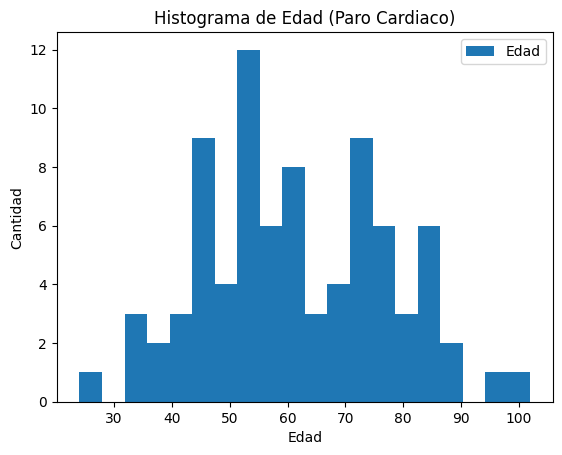

In [0]:
clases, cantidad = df_FinalAnalisis.groupby('Edad').count().select('count').rdd.flatMap(lambda x: x).histogram(20)
plt.hist(clases[:-1], bins=clases, weights=cantidad)
plt.ylabel('Cantidad')
plt.xlabel('Edad')
plt.title('Histograma de Edad (Paro Cardiaco)')
plt.legend(['Edad'])
plt.show()